This notebook  extracts, compares, and visualizes SHAP and LIME feature importance across multiple models. It first loads and cleans the data, then identifies the top 10%, 20%, and 30% most important features per model for both methods. It aggregates features across models, finds common dimensions between SHAP and LIME, and saves the results in structured CSV files. Finally, it visualizes the findings using bar plots (feature importance), Venn diagrams (overlapping features), and frequency charts to highlight the most influential dimensions.

In [ ]:
import pandas as pd
import plotly.express as px
import re
from collections import Counter
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Step 1 :Load & preprocess data



*   Load SHAP and LIME feature importance CSV files.
*   Extract model names from both datasets.
*   Clean LIME model names to match SHAP models for proper alignment.







In [ ]:
# Load SHAP feature importance CSV
shap_df = pd.read_csv("/content/shap_feature_importance_all_models.csv")

# Load LIME feature importance CSV
lime_df = pd.read_csv("/content/lime_feature_importance_all_models.csv", index_col=0)

# Extract SHAP model names
shap_models = shap_df.columns[1:-1]  # Excluding 'Feature' and 'Mean Importance'

# Extract and clean LIME model names (remove tuple formatting)
lime_models = lime_df.columns
clean_lime_models = {re.sub(r"[\(\)']", "", model).split(",")[0].strip(): model for model in lime_models}

print(f"✅ Cleaned LIME Models: {list(clean_lime_models.keys())}")

✅ Cleaned LIME Models: ['camem_bert_base_embeddings', 'distilled_bert_base_cased', 'flaubert_base_cased', 'flaubert_base_uncased', 'flaubert_large_uncased', 'flaubert_small_cased', 'mbert_base_cased', 'mbert_base_uncased', 'xlmr_r_large', 'xlm_roberta_base']


In [ ]:
shap_df

,Feature,camem_bert_base_embeddings,distilled_bert_base_cased,flaubert_base_cased,flaubert_base_uncased,flaubert_large_uncased,flaubert_small_cased,mbert_base_cased,mbert_base_uncased,xlmr_r_large,xlm_roberta_base,Mean Importance
0,Dim 1012,NaN,NaN,NaN,NaN,0.017380,NaN,NaN,NaN,0.052533,NaN,0.034956
1,Dim 971,NaN,NaN,NaN,NaN,0.018363,NaN,NaN,NaN,0.039607,NaN,0.028985
2,Dim 453,0.005313,0.013851,0.021146,0.025093,0.010345,0.026715,0.107030,0.038046,0.019581,0.001145,0.026827
3,Dim 934,NaN,NaN,NaN,NaN,0.024552,NaN,NaN,NaN,0.028338,NaN,0.026445
4,Dim 198,0.052400,0.013961,0.006006,0.029648,0.010734,0.043431,0.062678,0.012758,0.022906,0.001636,0.025616
...,...,...,...,...,...,...,...,...,...,...,...,...
1019,Dim 1004,NaN,NaN,NaN,NaN,0.003230,NaN,NaN,NaN,0.001427,NaN,0.002329
1020,Dim 834,NaN,NaN,NaN,NaN,0.002809,NaN,NaN,NaN,0.001564,NaN,0.002187
1021,Dim 833,NaN,NaN,NaN,NaN,0.003884,NaN,NaN,NaN,0.000281,NaN,0.002083
1022,Dim 1019,NaN,NaN,NaN,NaN,0.000921,NaN,NaN,NaN,0.002310,NaN,0.001616


In [ ]:
lime_df

,"('camem_bert_base_embeddings', 1)","('distilled_bert_base_cased', 1)","('flaubert_base_cased', 1)","('flaubert_base_uncased', 1)","('flaubert_large_uncased', 1)","('flaubert_small_cased', 1)","('mbert_base_cased', 1)","('mbert_base_uncased', 1)","('xlmr_r_large', 1)","('xlm_roberta_base', 1)"
Dim 0,0.013925,0.005983,0.012370,0.019074,0.011425,0.012511,0.0,0.016796,0.000084,0.0
Dim 1,0.025022,0.010357,0.015995,0.013978,0.012045,0.012298,0.0,0.016507,0.000091,0.0
Dim 2,0.013153,0.017594,0.027113,0.021994,0.010257,0.025812,0.0,0.013349,0.000093,0.0
Dim 3,0.015289,0.008120,0.015632,0.017206,0.012873,0.021776,0.0,0.012940,0.000062,0.0
Dim 4,0.011512,0.008155,0.015627,0.019182,0.015790,0.019761,0.0,0.011371,0.000088,0.0
...,...,...,...,...,...,...,...,...,...,...
Dim 1019,0.000000,0.000000,0.000000,0.000000,0.011327,0.000000,0.0,0.000000,0.000109,0.0
Dim 1020,0.000000,0.000000,0.000000,0.000000,0.015120,0.000000,0.0,0.000000,0.000061,0.0
Dim 1021,0.000000,0.000000,0.000000,0.000000,0.012012,0.000000,0.0,0.000000,0.000101,0.0
Dim 1022,0.000000,0.000000,0.000000,0.000000,0.053458,0.000000,0.0,0.000000,0.000125,0.0


In [ ]:
# Define percentage of top features to extract (used for both SHAP & LIME)
top_feature_percentages = [10, 20, 30]


# STEP 2: Extract SHAP & LIME Features Per Model

**SHAP and LIME Feature Extraction:**

*  Sort the importance values per model and Extract the top 10%, 20%, and 30% features
*   Store them in a dictionary (top_s/L_features).
*  Merge top S/L features across models for each percentage and Count occurrences of each feature across models.






In [ ]:
top_shap_features = {}
top_lime_features = {}

for model in shap_models:
    if model not in clean_lime_models:
        print(f"Model '{model}' not found in LIME, skipping...")
        continue

    top_shap_features[model] = {}
    top_lime_features[model] = {}

    for percent in top_feature_percentages:
        num_features_shap = int((percent / 100) * len(shap_df))
        num_features_lime = int((percent / 100) * len(lime_df))

        # Ensure SHAP feature extraction is model-specific
        if model in shap_df.columns:
            sorted_shap_df = shap_df.sort_values(by=model, ascending=False)  # Sort by importance for the model
            selected_shap_features = sorted_shap_df.iloc[:num_features_shap]["Feature"].tolist()
        else:
            selected_shap_features = []

        # Ensure LIME feature extraction is model-specific
        lime_model_col = clean_lime_models[model]
        if lime_model_col in lime_df.columns:
            sorted_lime_df = lime_df.sort_values(by=lime_model_col, ascending=False)  # Sort by importance
            selected_lime_features = sorted_lime_df.iloc[:num_features_lime].index.tolist()
        else:
            selected_lime_features = []

        top_shap_features[model][percent] = selected_shap_features
        top_lime_features[model][percent] = selected_lime_features


In [ ]:
#Print Extracted SHAP & LIME Top Features
for model in shap_models:
    if model not in top_shap_features:
        continue

    print(f"\n🔹 Extracted SHAP Features for {model}:")
    for percent in top_feature_percentages:
        if percent not in top_shap_features[model]:
            continue
        print(f"  ✅ Top {percent}%: {top_shap_features[model][percent][:10]} ...")  # Print first 10 features



🔹 Extracted SHAP Features for camem_bert_base_embeddings:
  ✅ Top 10%: ['Dim 465', 'Dim 713', 'Dim 144', 'Dim 23', 'Dim 579', 'Dim 714', 'Dim 147', 'Dim 692', 'Dim 198', 'Dim 454'] ...
  ✅ Top 20%: ['Dim 465', 'Dim 713', 'Dim 144', 'Dim 23', 'Dim 579', 'Dim 714', 'Dim 147', 'Dim 692', 'Dim 198', 'Dim 454'] ...
  ✅ Top 30%: ['Dim 465', 'Dim 713', 'Dim 144', 'Dim 23', 'Dim 579', 'Dim 714', 'Dim 147', 'Dim 692', 'Dim 198', 'Dim 454'] ...

🔹 Extracted SHAP Features for distilled_bert_base_cased:
  ✅ Top 10%: ['Dim 646', 'Dim 282', 'Dim 70', 'Dim 643', 'Dim 474', 'Dim 540', 'Dim 762', 'Dim 124', 'Dim 354', 'Dim 652'] ...
  ✅ Top 20%: ['Dim 646', 'Dim 282', 'Dim 70', 'Dim 643', 'Dim 474', 'Dim 540', 'Dim 762', 'Dim 124', 'Dim 354', 'Dim 652'] ...
  ✅ Top 30%: ['Dim 646', 'Dim 282', 'Dim 70', 'Dim 643', 'Dim 474', 'Dim 540', 'Dim 762', 'Dim 124', 'Dim 354', 'Dim 652'] ...

🔹 Extracted SHAP Features for flaubert_base_cased:
  ✅ Top 10%: ['Dim 587', 'Dim 135', 'Dim 428', 'Dim 674', 'Dim 668', 

In [ ]:
#  SHAP Top Features Across Models

aggregated_shap_features = {percent: [] for percent in top_feature_percentages}

for model in shap_models:
    for percent in top_feature_percentages:
        if model in top_shap_features and percent in top_shap_features[model]:
            aggregated_shap_features[percent].extend(top_shap_features[model][percent])

print("\n🔹 Aggregated SHAP Top Features Across Models:")
for percent in top_feature_percentages:
    print(f"  ✅ Top {percent}%: {Counter(aggregated_shap_features[percent]).most_common(10)} ...")


🔹 Aggregated SHAP Top Features Across Models:
  ✅ Top 10%: [('Dim 198', 4), ('Dim 91', 4), ('Dim 484', 4), ('Dim 165', 4), ('Dim 602', 4), ('Dim 241', 4), ('Dim 376', 4), ('Dim 269', 4), ('Dim 52', 4), ('Dim 644', 4)] ...
  ✅ Top 20%: [('Dim 142', 7), ('Dim 470', 6), ('Dim 376', 6), ('Dim 746', 6), ('Dim 347', 6), ('Dim 230', 6), ('Dim 282', 6), ('Dim 391', 6), ('Dim 762', 6), ('Dim 209', 6)] ...
  ✅ Top 30%: [('Dim 391', 8), ('Dim 605', 8), ('Dim 170', 8), ('Dim 147', 7), ('Dim 233', 7), ('Dim 161', 7), ('Dim 376', 7), ('Dim 277', 7), ('Dim 142', 7), ('Dim 230', 7)] ...


# STEP 3: Plot SHAP Feature Importance Per Percentage

SHAP Feature Extraction:

Sort SHAP importance values per model.
Extract the top 10%, 20%, and 30% features
Store them in a dictionary (top_shap_features).
LIME Feature Extraction:

Sort LIME feature importance values per model.
Extract the top 10%, 20%, and 30% features
Store them in a dictionary (top_limes_features).
Print extracted features for verification.

In [ ]:
for percent in top_feature_percentages:
    aggregated_shap_features = []
    for model in shap_models:
        if model in top_shap_features and percent in top_shap_features[model]:
            aggregated_shap_features.extend(top_shap_features[model][percent])

    shap_counts = pd.Series(aggregated_shap_features).value_counts()
    selected_features = pd.DataFrame({
        "Feature": shap_counts.index,
        "Mean Importance": shap_counts.values
    }).head(50)  # Show top 50 most frequent dimensions

    fig = px.bar(
        selected_features,
        x="Feature",
        y="Mean Importance",
        title=f"Top {percent}% SHAP Feature Importance",
        labels={"Feature": "Feature Dimension", "Mean Importance": "SHAP Importance"},
    )
    fig.show()


# STEP 4: Plot LIME Feature Importance Per Percentage

In [ ]:
for model in clean_lime_models:
    if model not in top_lime_features:
        continue

    print(f"\n🔹 Extracted LIME Features for {model}:")
    for percent in top_feature_percentages:
        if percent not in top_lime_features[model]:
            continue
        print(f"  ✅ Top {percent}%: {top_lime_features[model][percent][:10]} ...")  # Print first 10 features



🔹 Extracted LIME Features for camem_bert_base_embeddings:
  ✅ Top 10%: ['Dim 274', 'Dim 465', 'Dim 144', 'Dim 714', 'Dim 713', 'Dim 23', 'Dim 309', 'Dim 434', 'Dim 692', 'Dim 600'] ...
  ✅ Top 20%: ['Dim 274', 'Dim 465', 'Dim 144', 'Dim 714', 'Dim 713', 'Dim 23', 'Dim 309', 'Dim 434', 'Dim 692', 'Dim 600'] ...
  ✅ Top 30%: ['Dim 274', 'Dim 465', 'Dim 144', 'Dim 714', 'Dim 713', 'Dim 23', 'Dim 309', 'Dim 434', 'Dim 692', 'Dim 600'] ...

🔹 Extracted LIME Features for distilled_bert_base_cased:
  ✅ Top 10%: ['Dim 646', 'Dim 643', 'Dim 721', 'Dim 715', 'Dim 331', 'Dim 762', 'Dim 78', 'Dim 474', 'Dim 282', 'Dim 2'] ...
  ✅ Top 20%: ['Dim 646', 'Dim 643', 'Dim 721', 'Dim 715', 'Dim 331', 'Dim 762', 'Dim 78', 'Dim 474', 'Dim 282', 'Dim 2'] ...
  ✅ Top 30%: ['Dim 646', 'Dim 643', 'Dim 721', 'Dim 715', 'Dim 331', 'Dim 762', 'Dim 78', 'Dim 474', 'Dim 282', 'Dim 2'] ...

🔹 Extracted LIME Features for flaubert_base_cased:
  ✅ Top 10%: ['Dim 466', 'Dim 359', 'Dim 674', 'Dim 426', 'Dim 407', 'Dim 5

In [ ]:
# Print Aggregated LIME Top Features Across Models

aggregated_lime_features = {percent: [] for percent in top_feature_percentages}

for model in shap_models:
    for percent in top_feature_percentages:
        if model in top_lime_features and percent in top_lime_features[model]:
            aggregated_lime_features[percent].extend(top_lime_features[model][percent])

print("\n🔹 Aggregated LIME Top Features Across Models:")
for percent in top_feature_percentages:
    print(f"  ✅ Top {percent}%: {Counter(aggregated_lime_features[percent]).most_common(10)} ...")


🔹 Aggregated LIME Top Features Across Models:
  ✅ Top 10%: [('Dim 762', 7), ('Dim 691', 6), ('Dim 752', 6), ('Dim 644', 5), ('Dim 664', 5), ('Dim 453', 5), ('Dim 71', 4), ('Dim 662', 4), ('Dim 347', 4), ('Dim 142', 4)] ...
  ✅ Top 20%: [('Dim 762', 7), ('Dim 752', 7), ('Dim 529', 6), ('Dim 691', 6), ('Dim 536', 6), ('Dim 359', 6), ('Dim 19', 6), ('Dim 666', 6), ('Dim 566', 6), ('Dim 683', 6)] ...
  ✅ Top 30%: [('Dim 683', 8), ('Dim 744', 8), ('Dim 600', 7), ('Dim 582', 7), ('Dim 602', 7), ('Dim 666', 7), ('Dim 712', 7), ('Dim 735', 7), ('Dim 525', 7), ('Dim 637', 7)] ...


In [ ]:

for percent in top_feature_percentages:
    aggregated_lime_features = []
    for model in shap_models:
        if model in top_lime_features and percent in top_lime_features[model]:
            aggregated_lime_features.extend(top_lime_features[model][percent])

    lime_counts = pd.Series(aggregated_lime_features).value_counts()
    selected_features = pd.DataFrame({
        "Feature": lime_counts.index,
        "Mean Importance": lime_counts.values
    }).head(50)  # Show top 50 most frequent dimensions

    fig = px.bar(
        selected_features,
        x="Feature",
        y="Mean Importance",
        title=f"Top {percent}% LIME Feature Importance",
        labels={"Feature": "Feature Dimension", "Mean Importance": "LIME Importance"},
    )
    fig.show()


# STEP 5: compare SHAP & LIME features for each model

In [ ]:
common_dimensions_per_model = {}
common_features_output = []

for model in shap_models:
    if model not in clean_lime_models:
        print(f"Model '{model}' not found in LIME, skipping...")
        continue

    print(f"\n🔹 Checking Model: {model}")
    common_dimensions_per_model[model] = {}

    for percent in top_feature_percentages:
        if model not in top_shap_features or model not in top_lime_features:
            print(f"No features found for {model} at {percent}% in SHAP or LIME. Skipping...")
            continue

        if percent not in top_shap_features[model] or percent not in top_lime_features[model]:
            print(f"No features found for Top {percent}% in SHAP or LIME. Skipping...")
            continue

        # Convert feature lists into sets for comparison
        top_shap_set = set(top_shap_features[model][percent])
        top_lime_set = set(top_lime_features[model][percent])

        # Find common features
        common_features = top_shap_set.intersection(top_lime_set)

        # Store results
        common_dimensions_per_model[model][percent] = list(common_features)

        # Print sample common features
        print(f"✅ {model} | Top {percent}% - Common Features: {len(common_features)} | Sample: {list(common_features)[:10]}")

         # Save results for CSV
        common_features_output.append({
            "Model": model,
            "Percentage": percent,
            "Common Features Count": len(common_features),
            "Common Features": ", ".join(common_features)
        })


🔹 Checking Model: camem_bert_base_embeddings
✅ camem_bert_base_embeddings | Top 10% - Common Features: 76 | Sample: ['Dim 582', 'Dim 347', 'Dim 196', 'Dim 441', 'Dim 239', 'Dim 526', 'Dim 161', 'Dim 312', 'Dim 454', 'Dim 69']
✅ camem_bert_base_embeddings | Top 20% - Common Features: 170 | Sample: ['Dim 582', 'Dim 347', 'Dim 196', 'Dim 441', 'Dim 239', 'Dim 526', 'Dim 592', 'Dim 646', 'Dim 651', 'Dim 444']
✅ camem_bert_base_embeddings | Top 30% - Common Features: 257 | Sample: ['Dim 239', 'Dim 347', 'Dim 582', 'Dim 526', 'Dim 196', 'Dim 441', 'Dim 646', 'Dim 592', 'Dim 119', 'Dim 143']

🔹 Checking Model: distilled_bert_base_cased
✅ distilled_bert_base_cased | Top 10% - Common Features: 69 | Sample: ['Dim 721', 'Dim 646', 'Dim 441', 'Dim 656', 'Dim 124', 'Dim 143', 'Dim 652', 'Dim 763', 'Dim 214', 'Dim 460']
✅ distilled_bert_base_cased | Top 20% - Common Features: 159 | Sample: ['Dim 582', 'Dim 721', 'Dim 646', 'Dim 441', 'Dim 347', 'Dim 649', 'Dim 143', 'Dim 134', 'Dim 241', 'Dim 147']

# Step 6:save results into csv

In [ ]:
# Save common features into a CSV file
common_features_df = pd.DataFrame(common_features_output)
common_features_df.to_csv("common_shap_lime_features_per_model.csv", index=False)

print("\n✅ Common SHAP & LIME Features per Model saved to 'common_shap_lime_features_per_model.csv'")


✅ Common SHAP & LIME Features per Model saved to 'common_shap_lime_features_per_model.csv'


# Step 7:visualizations

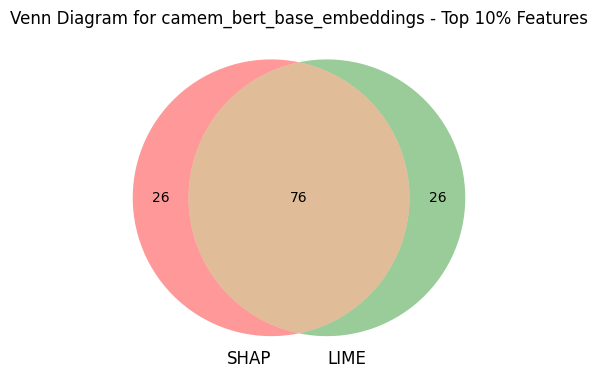

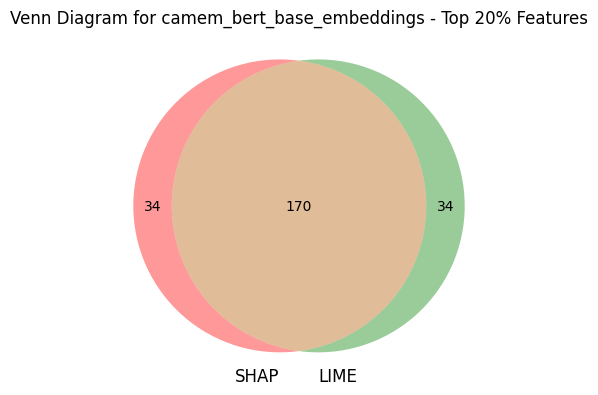

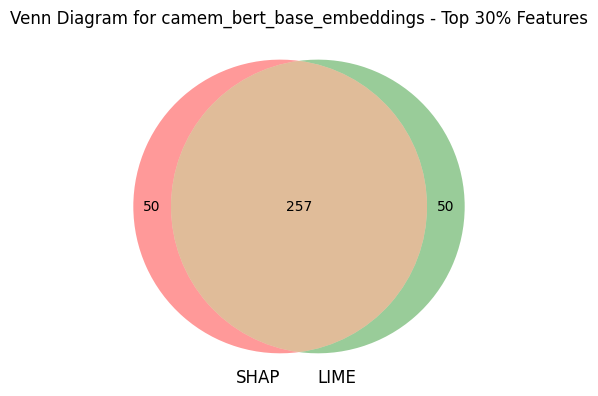

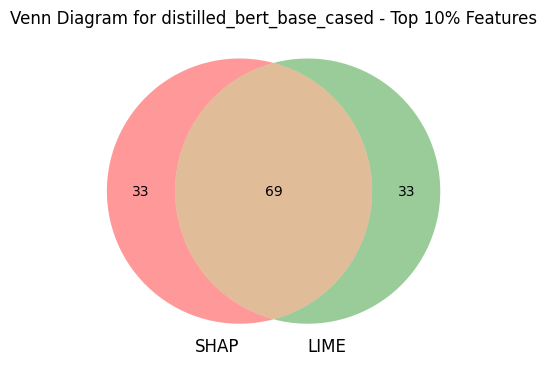

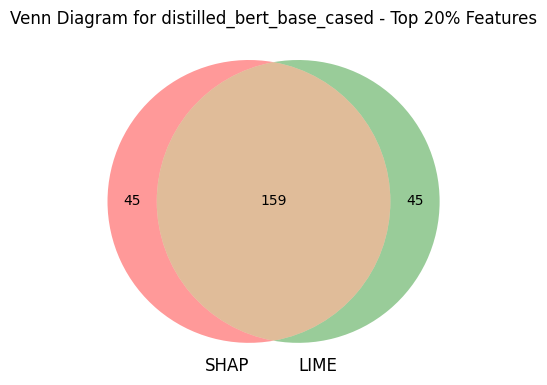

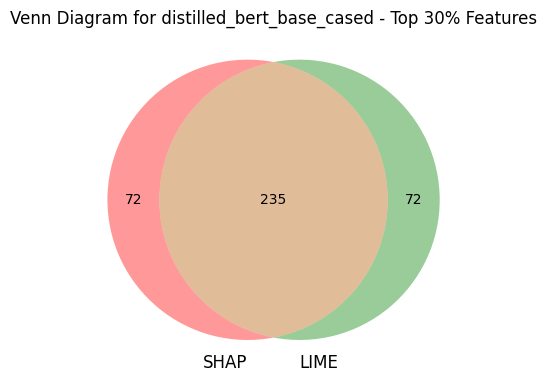

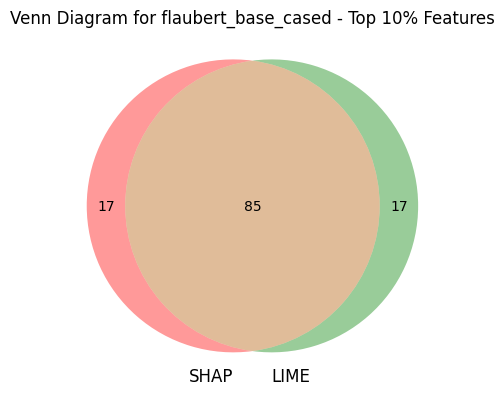

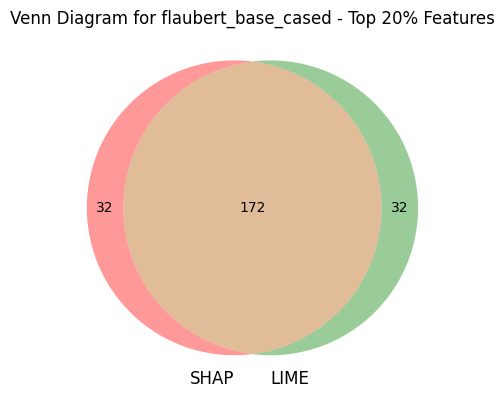

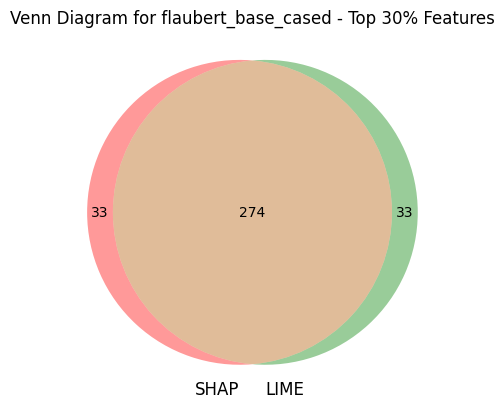

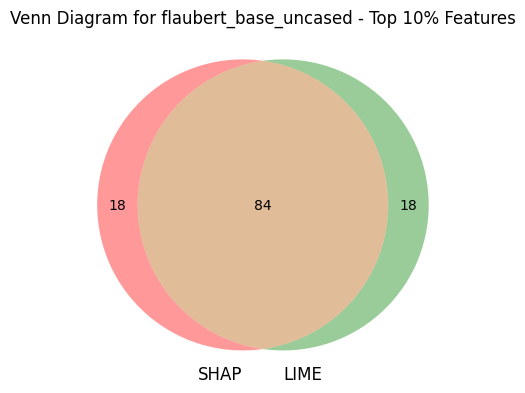

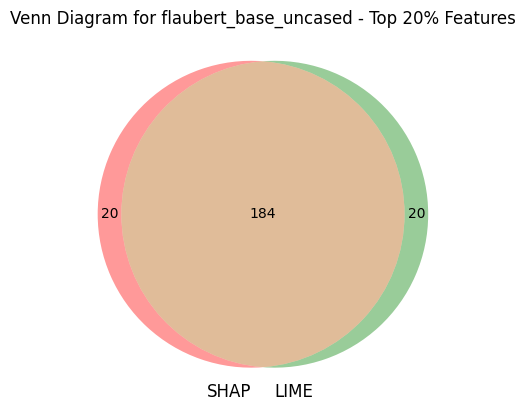

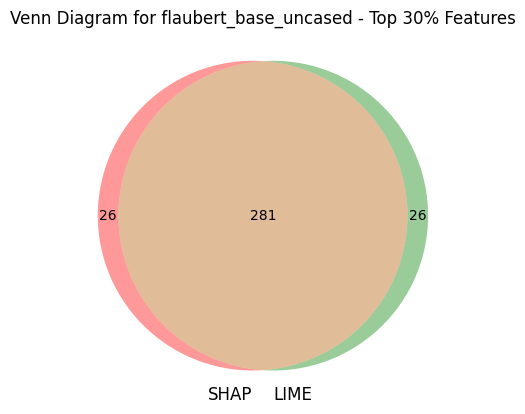

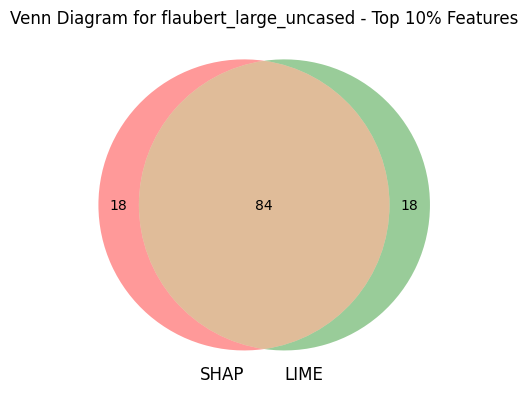

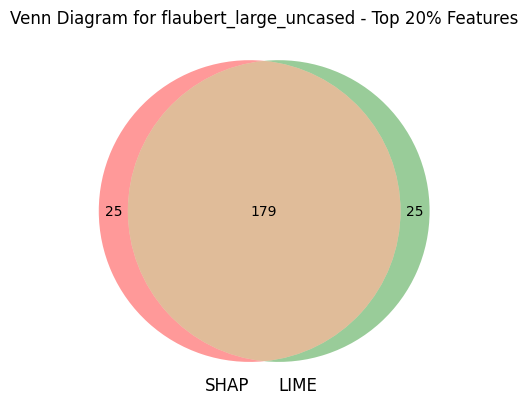

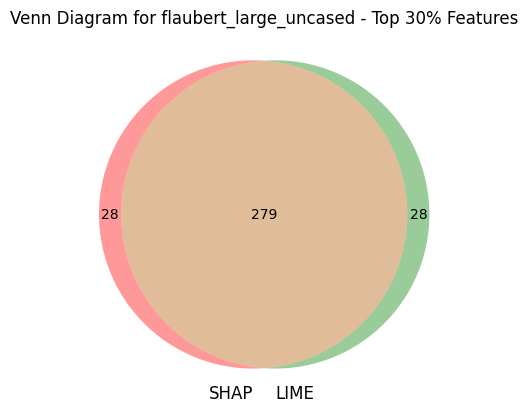

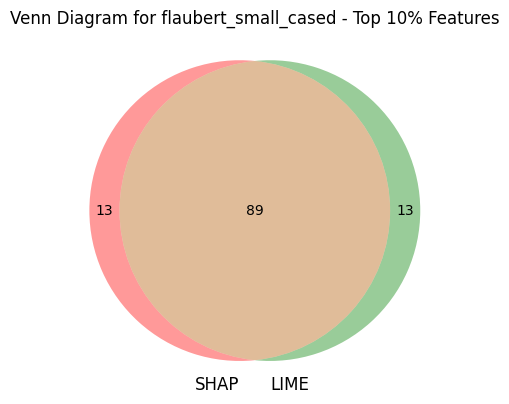

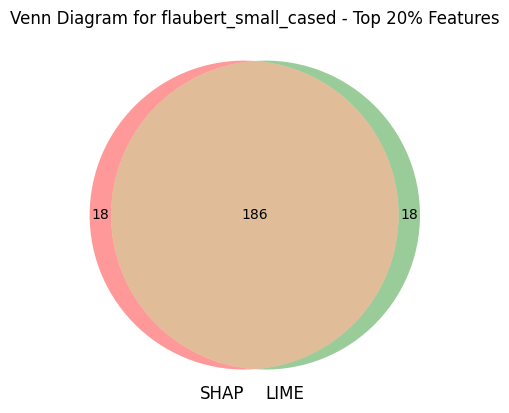

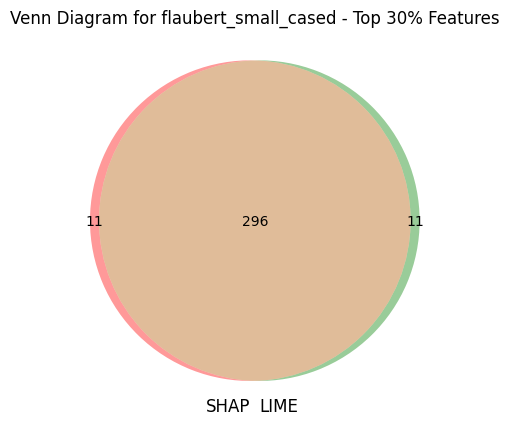

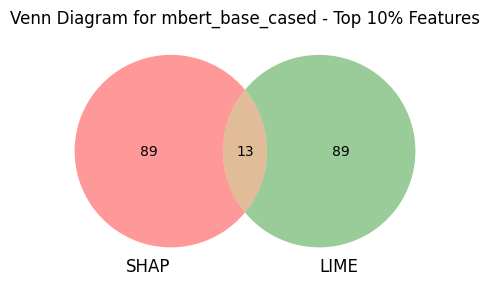

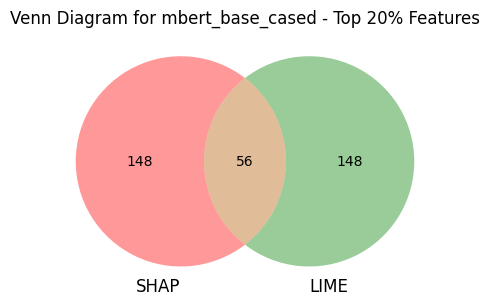

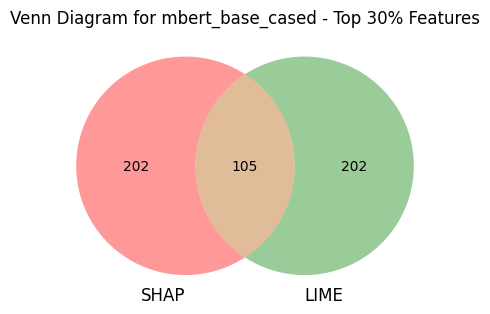

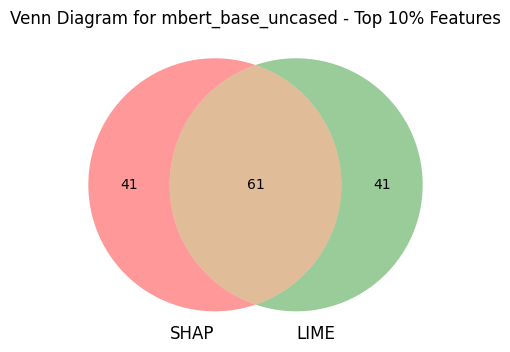

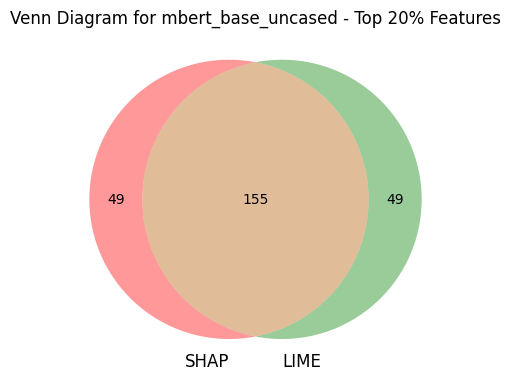

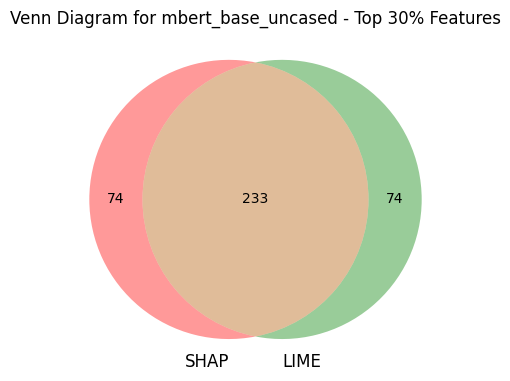

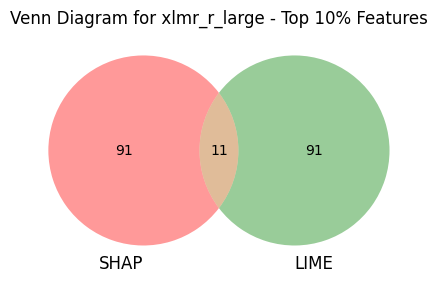

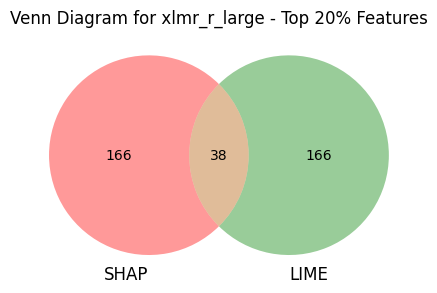

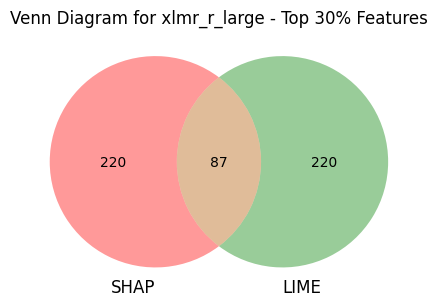

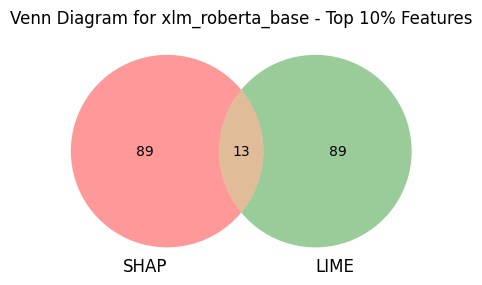

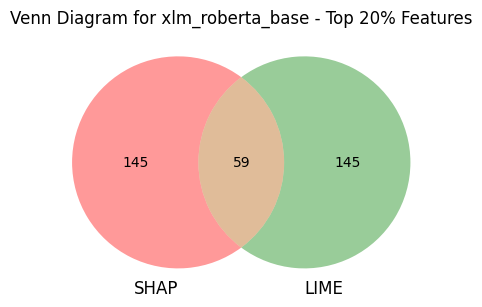

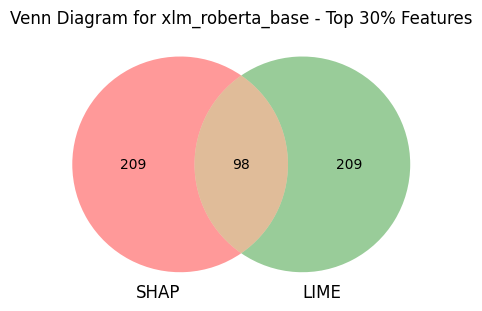

In [ ]:
for model in common_dimensions_per_model:
    for percent in top_feature_percentages:
        if percent not in common_dimensions_per_model[model]:
            continue

        shap_set = set(top_shap_features[model][percent])
        lime_set = set(top_lime_features[model][percent])
        common_set = shap_set.intersection(lime_set)

        plt.figure(figsize=(5, 5))
        venn2([shap_set, lime_set], set_labels=("SHAP", "LIME"))
        plt.title(f"Venn Diagram for {model} - Top {percent}% Features")
        plt.show()


In [ ]:

#for percent in top_feature_percentages:
    #models_to_plot = list(common_dimensions_per_model.keys())
    #num_models = len(models_to_plot)
    #num_rows = (num_models // 5) + (1 if num_models % 5 else 0)  # 5 per row

    #fig, axes = plt.subplots(num_rows, 5, figsize=(20, num_rows * 5))
    #axes = axes.flatten()

    #for idx, model in enumerate(models_to_plot):
        #if percent not in common_dimensions_per_model[model]:
         #   continue

        #shap_set = set(top_shap_features[model][percent])
       # lime_set = set(top_lime_features[model][percent])
      #  common_set = shap_set.intersection(lime_set)

     #   venn2([shap_set, lime_set], set_labels=("SHAP", "LIME"), ax=axes[idx])
    #    axes[idx].set_title(f"{model} - Top {percent}% Features")

   # plt.tight_layout()
  #  plt.show()

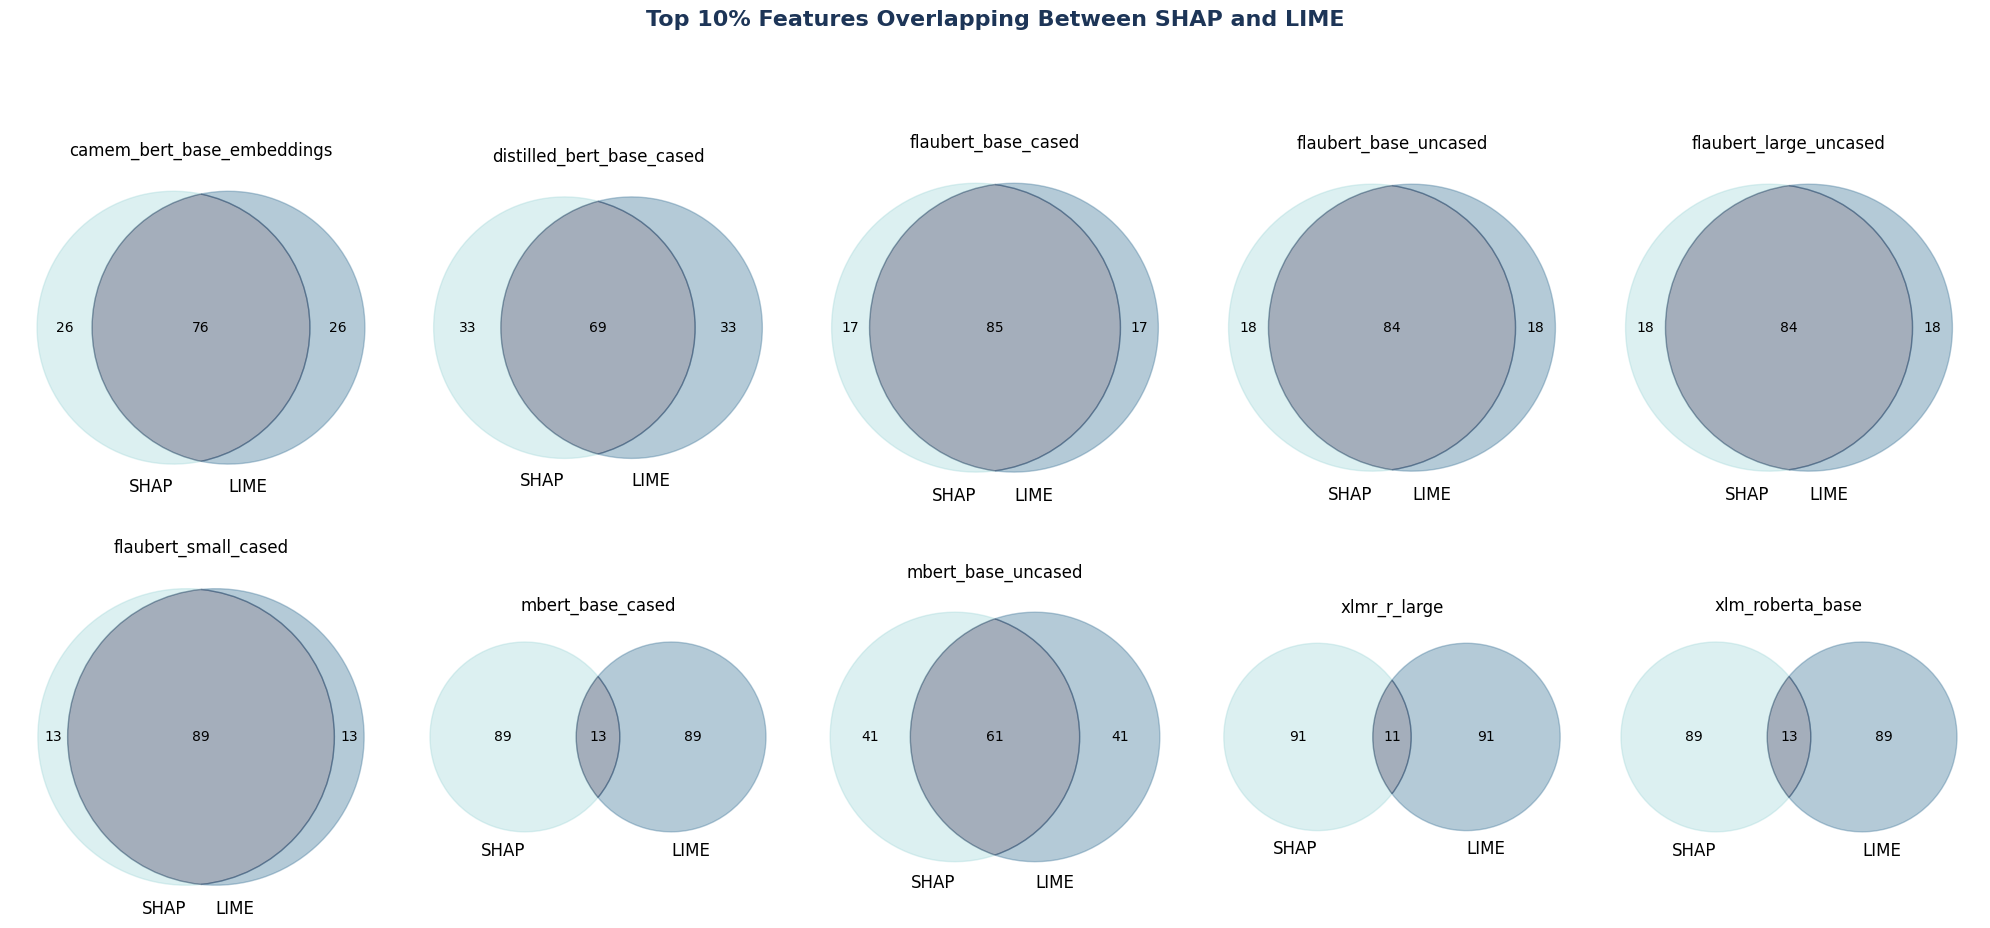

In [ ]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

percent = 10  # Change this value to the desired percentage

models_to_plot = list(common_dimensions_per_model.keys())
num_models = len(models_to_plot)
num_rows = (num_models // 5) + (1 if num_models % 5 else 0)  # 5 per row

fig, axes = plt.subplots(num_rows, 5, figsize=(20, num_rows * 5))
axes = axes.flatten()

for idx, model in enumerate(models_to_plot):
    if percent not in common_dimensions_per_model[model]:
        continue

    shap_set = set(top_shap_features[model][percent])
    lime_set = set(top_lime_features[model][percent])
    common_set = shap_set.intersection(lime_set)

    venn = venn2([shap_set, lime_set], set_labels=("SHAP", "LIME"), ax=axes[idx])

    # Set custom colors
    venn.get_patch_by_id('10').set_color("#a8dadc")  # SHAP only
    venn.get_patch_by_id('01').set_color("#457b9d")  # LIME only
    venn.get_patch_by_id('11').set_color("#1d3557")  # Intersection

    axes[idx].set_title(f"{model}")

# Add a bold, centered title
plt.suptitle("Top 10% Features Overlapping Between SHAP and LIME", fontsize=16, fontweight="bold", color="#1d3557")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent overlap
plt.show()


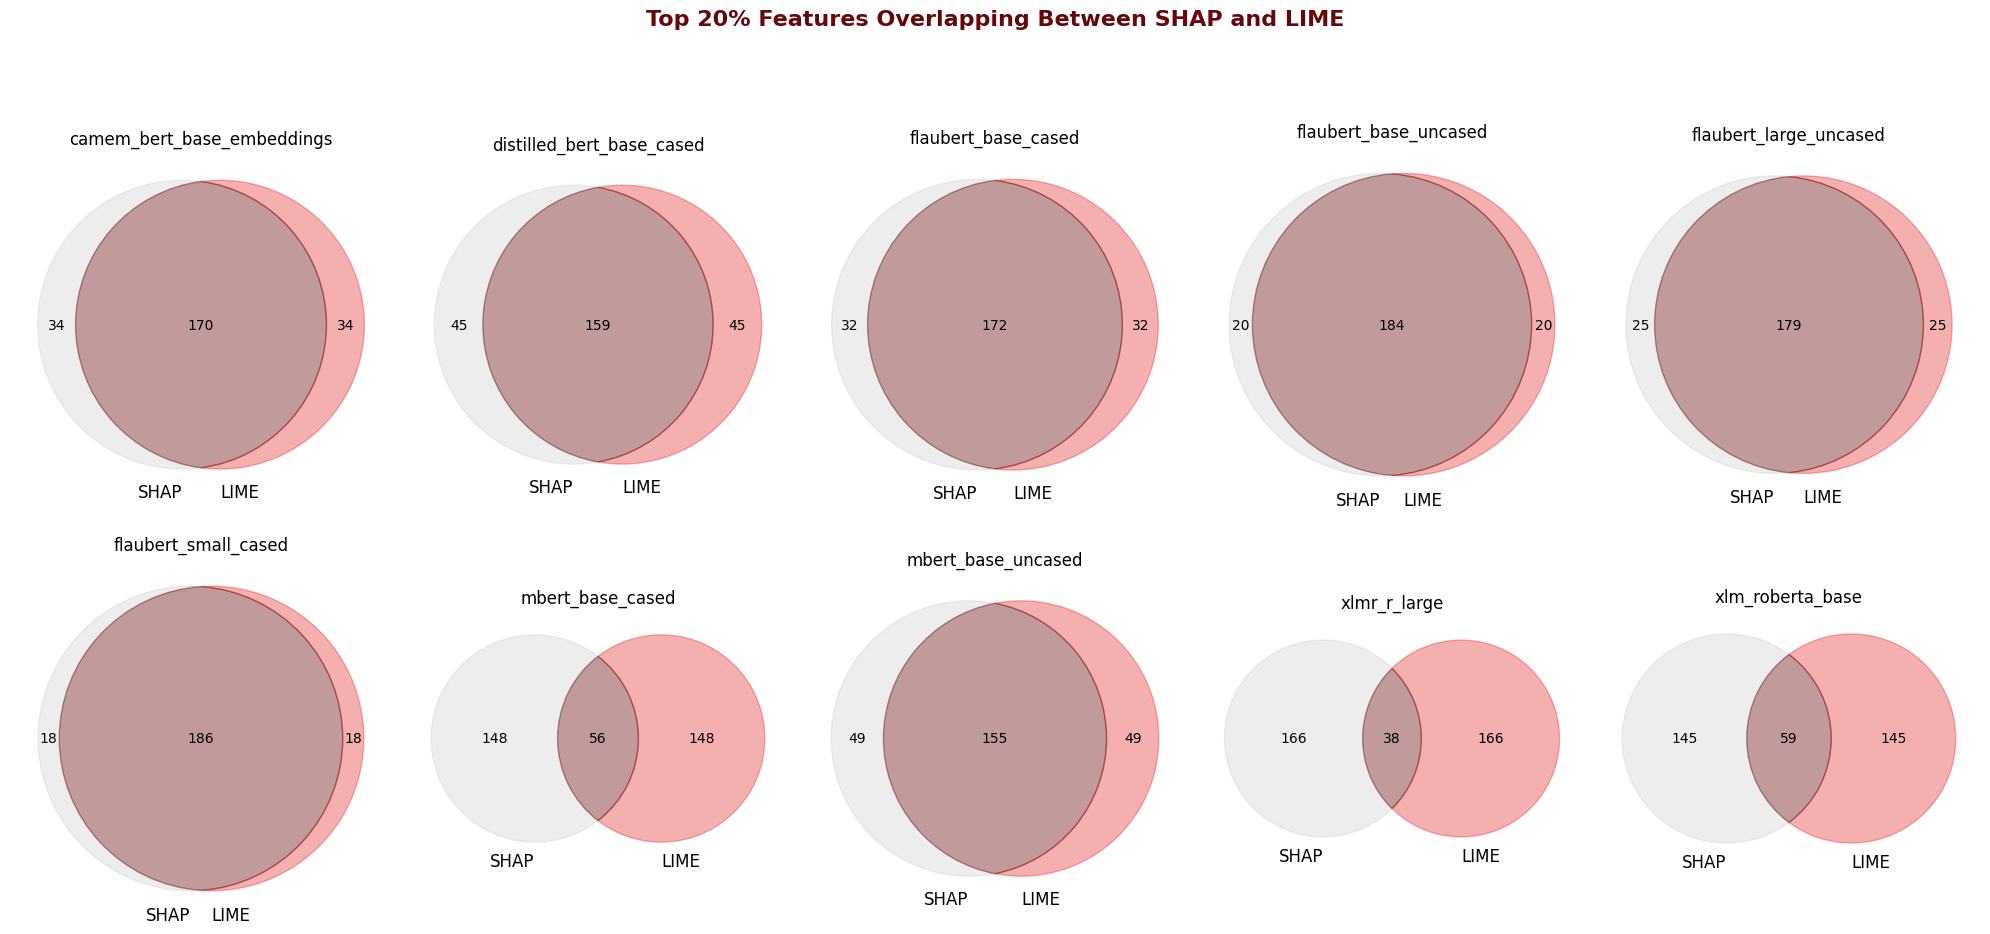

In [ ]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

percent = 20  # Change this value to the desired percentage

models_to_plot = list(common_dimensions_per_model.keys())
num_models = len(models_to_plot)
num_rows = (num_models // 5) + (1 if num_models % 5 else 0)  # 5 per row

fig, axes = plt.subplots(num_rows, 5, figsize=(20, num_rows * 5))
axes = axes.flatten()

for idx, model in enumerate(models_to_plot):
    if percent not in common_dimensions_per_model[model]:
        continue

    shap_set = set(top_shap_features[model][percent])
    lime_set = set(top_lime_features[model][percent])
    common_set = shap_set.intersection(lime_set)

    venn = venn2([shap_set, lime_set], set_labels=("SHAP", "LIME"), ax=axes[idx])

    # Set custom colors
    venn.get_patch_by_id('10').set_color("#d3d3d3")  # SHAP only (light gray)
    venn.get_patch_by_id('01').set_color("#e5383b")  # LIME only (red)
    venn.get_patch_by_id('11').set_color("#660708")  # Intersection (dark red)

    axes[idx].set_title(f"{model}")

# Add a bold, centered title
plt.suptitle("Top 20% Features Overlapping Between SHAP and LIME", fontsize=16, fontweight="bold", color="#660708")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent overlap
plt.show()


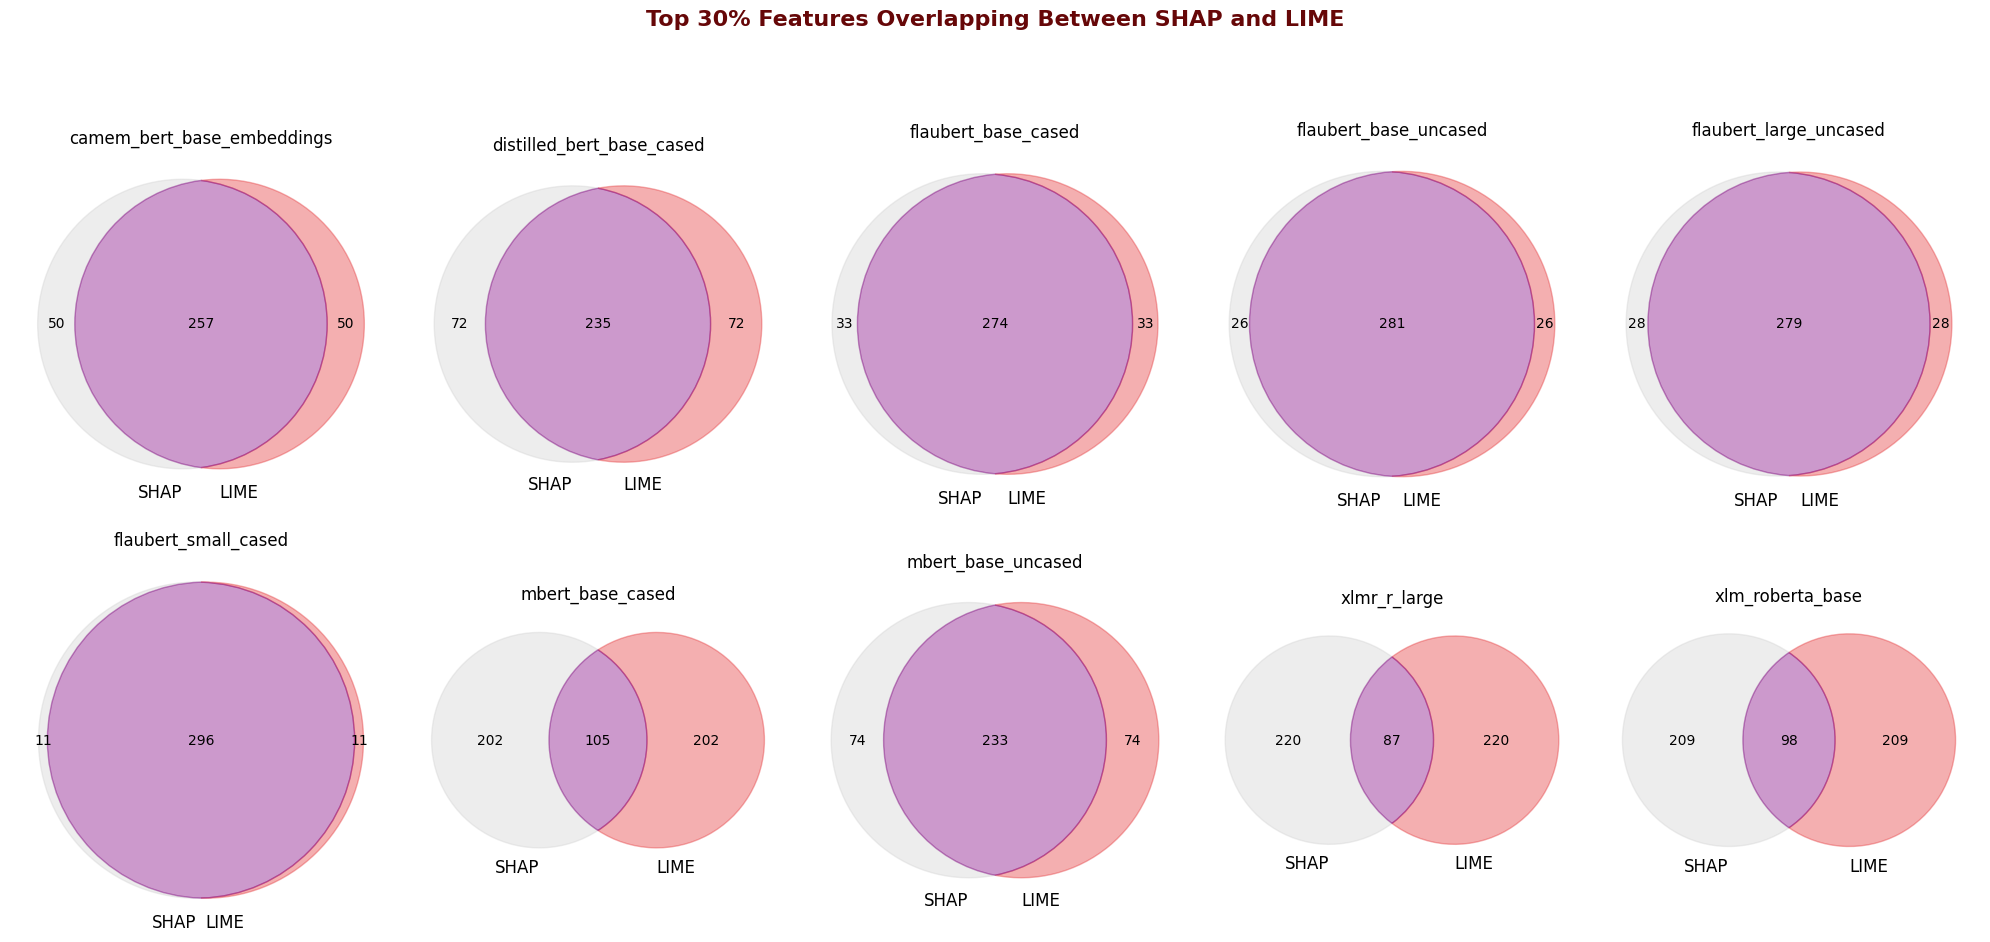

In [ ]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

percent = 30  # Change this value to the desired percentage

models_to_plot = list(common_dimensions_per_model.keys())
num_models = len(models_to_plot)
num_rows = (num_models // 5) + (1 if num_models % 5 else 0)  # 5 per row

fig, axes = plt.subplots(num_rows, 5, figsize=(20, num_rows * 5))
axes = axes.flatten()

for idx, model in enumerate(models_to_plot):
    if percent not in common_dimensions_per_model[model]:
        continue

    shap_set = set(top_shap_features[model][percent])
    lime_set = set(top_lime_features[model][percent])
    common_set = shap_set.intersection(lime_set)

    venn = venn2([shap_set, lime_set], set_labels=("SHAP", "LIME"), ax=axes[idx])

    # Set custom colors
    venn.get_patch_by_id('10').set_color("#d3d3d3")  # SHAP only (light gray)
    venn.get_patch_by_id('01').set_color("#e5383b")  # LIME only (red)
    venn.get_patch_by_id('11').set_color("#800080")  # Intersection (deep purple)


    axes[idx].set_title(f"{model}")

# Add a bold, centered title
plt.suptitle("Top 30% Features Overlapping Between SHAP and LIME", fontsize=16, fontweight="bold", color="#660708")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent overlap
plt.show()


- Finding the most frequently occurring dimensions across models.

- Printing the top 20 most frequent features.

- Plotting a bar chart using Plotly to visualize the top 20 dimensions.

In [ ]:
# Flatten all common features across models
all_common_features = []
for model, percentage_data in common_dimensions_per_model.items():
    for percent, common_features in percentage_data.items():
        all_common_features.extend(common_features)

# Count occurrences of each dimension
common_feature_counts = Counter(all_common_features)

# Convert to DataFrame
common_features_df = pd.DataFrame(common_feature_counts.items(), columns=["Feature", "Count"])
common_features_df = common_features_df.sort_values(by="Count", ascending=False)

# Display the top most frequent features
print("\n🔹 Most Frequently Occurring Features Across Models:")
print(common_features_df.head(20))  # Show top 20 most frequent features


🔹 Most Frequently Occurring Features Across Models:
     Feature  Count
272  Dim 762     16
21   Dim 142     14
390   Dim 66     13
1    Dim 347     13
281  Dim 752     13
39   Dim 644     12
63   Dim 165     12
491  Dim 300     12
246  Dim 422     11
30   Dim 376     11
165  Dim 391     11
123  Dim 729     11
314  Dim 209     11
323  Dim 310     11
169  Dim 282     11
69   Dim 168     11
464  Dim 453     11
249  Dim 618     11
12   Dim 147     11
230  Dim 220     11


In [ ]:
# Plot using Plotly
fig = px.bar(
    common_features_df.head(20),
    x="Feature",
    y="Count",
    title="Top 20 Most Frequently Occurring Features Across Models",
    labels={"Feature": "Feature Dimension", "Count": "Occurrence Count"},
)
fig.show()
